In [1]:
#! /usr/bin/env pyhton

In [2]:
# import modules
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [3]:
# pull dataset
data = pd.read_pickle("./nutrition_data_clean.pkl")
data

,name,Food Group,Branded?,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq/100g),Eutr emissions (kg PO43-eq per 100g),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,NaN,1.70,260.0,0.653846,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,Waffle Plain Frozen Ready-To-Heat Microwave,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,NaN,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,Romaine Lettuce Raw,Vegetables,NaN,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,Palak Paneer,Vegetables,NaN,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,0.008875,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,Carrots Raw Salad,Vegetables,NaN,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


In [4]:
# drop all non carbon and nutritional columns
data.drop(data.columns[:7], axis=1, inplace=True)
data

,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq/100g),Eutr emissions (kg PO43-eq per 100g),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,0.3482,0.1441,56.7,0.001209,0.000706,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,0.3482,0.1441,56.7,0.001209,0.000706,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,0.3482,0.1441,56.7,0.001209,0.000706,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,0.3482,0.1441,56.7,0.001209,0.000706,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,0.3482,0.1441,56.7,0.001209,0.000706,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,0.0310,0.0455,8.3,0.000531,0.000186,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,0.0310,0.0455,8.3,0.000531,0.000186,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,8.0642,2.1240,473.5,0.014894,0.008875,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,0.0310,0.0455,8.3,0.000531,0.000186,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


In [5]:
# drop rows with NaNs
data = data.dropna()

In [6]:
# check column datatypes
print(data.dtypes)

Land use (m2/100g)                       float64
GHG(kgco2eq/100g)                        float64
Water use (L/100g)                       float64
Acidifying emissions(kgSO2eq/100g)       float64
Eutr emissions  (kg PO43-eq per 100g)    float64
Calories                                   int64
Fat (g)                                  float64
Protein (g)                              float64
Carbohydrate (g)                         float64
Sugars (g)                               float64
Fiber (g)                                float64
Cholesterol (mg)                         float64
Saturated Fats (g)                       float64
dtype: object


In [7]:
# normalise the data by feature column
from sklearn import preprocessing
norm_data = preprocessing.normalize(data, axis=0)
norm_data = pd.DataFrame(norm_data, columns = data.columns) # processing loses columns headers so these must be reestablished
norm_data

,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq/100g),Eutr emissions (kg PO43-eq per 100g),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,0.001543,0.002214,0.017008,0.005001,0.003577,0.035649,0.019225,0.009091,0.042721,0.039173,0.006676,0.000000,0.015184
1,0.001543,0.002214,0.017008,0.005001,0.003577,0.029491,0.015728,0.013783,0.032828,0.007893,0.010491,0.006927,0.008867
2,0.001543,0.002214,0.017008,0.005001,0.003577,0.033380,0.016189,0.015543,0.038698,0.008095,0.012398,0.006003,0.010629
3,0.001543,0.002214,0.017008,0.005001,0.003577,0.031220,0.016035,0.014496,0.035316,0.008261,0.011445,0.007388,0.009610
4,0.001543,0.002214,0.017008,0.005001,0.003577,0.032192,0.016905,0.014056,0.036315,0.009252,0.011445,0.007388,0.007382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,0.000137,0.000699,0.002490,0.002197,0.000942,0.026035,0.017332,0.003477,0.032469,0.035061,0.013829,0.000000,0.007041
1185,0.000137,0.000699,0.002490,0.002197,0.000942,0.002053,0.000461,0.002912,0.003023,0.001303,0.014783,0.000000,0.000248
1186,0.035744,0.032640,0.142037,0.061614,0.044961,0.010371,0.011668,0.010955,0.003455,0.003469,0.005722,0.003232,0.006943
1187,0.000137,0.000699,0.002490,0.002197,0.000942,0.022470,0.026782,0.002556,0.013731,0.020615,0.010968,0.004156,0.011456


In [8]:
# import sklearn tools for MLP regression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [9]:
# extract nutritional info as input X
X = norm_data.iloc[:,5:]
X

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,0.035649,0.019225,0.009091,0.042721,0.039173,0.006676,0.000000,0.015184
1,0.029491,0.015728,0.013783,0.032828,0.007893,0.010491,0.006927,0.008867
2,0.033380,0.016189,0.015543,0.038698,0.008095,0.012398,0.006003,0.010629
3,0.031220,0.016035,0.014496,0.035316,0.008261,0.011445,0.007388,0.009610
4,0.032192,0.016905,0.014056,0.036315,0.009252,0.011445,0.007388,0.007382
...,...,...,...,...,...,...,...,...
1184,0.026035,0.017332,0.003477,0.032469,0.035061,0.013829,0.000000,0.007041
1185,0.002053,0.000461,0.002912,0.003023,0.001303,0.014783,0.000000,0.000248
1186,0.010371,0.011668,0.010955,0.003455,0.003469,0.005722,0.003232,0.006943
1187,0.022470,0.026782,0.002556,0.013731,0.020615,0.010968,0.004156,0.011456


In [10]:
# extract GHG emissions as output y
y = norm_data.iloc[:,1:2]
y = np.ravel(y)
y

array([0.00221441, 0.00221441, 0.00221441, ..., 0.03263991, 0.00069921,
       0.00069921])

In [11]:
# split the dataset into train and test components, currently set at 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [12]:
##### Use MLP Regressor Algorythm
model = MLPRegressor(max_iter=500, solver='lbfgs') # lbfgs supposedly works better on small datasets
model.fit(X_train, y_train)

MLPRegressor(max_iter=500, solver='lbfgs')

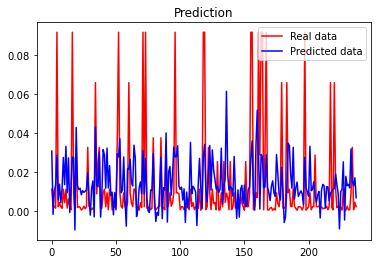

In [13]:
# compare test and predicted data
y_predict = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_predict, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [14]:
# Model score, not sure what this is....
model.score(X_test, y_test)

0.20644561666896277

In [15]:
# Model evaluation metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.014812818163646189
Mean Squared Error: 0.0004508099240493545
Root Mean Squared Error: 0.021232284946499622
